In [1]:
import numpy as np
from ml.datasets import FigurePrintDataset
import torchvision.transforms as transforms
from ml.models import EmbeddingNet, SiameseNet
import torch
import torchvision.utils
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score

In [3]:
x_real = np.load(r'E:\Projects\figureprint-recongition-ml\dataset\x_real.npz')['data']
y_real = np.load(r'E:\Projects\figureprint-recongition-ml\dataset\y_real.npy')
x_val = np.load(r'E:\Projects\figureprint-recongition-ml\dataset\x_val.npy')
label_val = np.load(r'E:\Projects\figureprint-recongition-ml\dataset\y_val.npy')

# x_data = np.concatenate([x_easy, x_medium, x_hard], axis=0)
# label_data = np.concatenate([y_easy, y_medium, y_hard], axis=0)
# x_train, x_val, label_train, label_val = train_test_split(
#     x_data, label_data, test_size=0.1)

print(x_val.shape, label_val.shape)

label_real_dict = {}

for i, y in enumerate(y_real):
    key = y.astype(str)
    key = ''.join(key).zfill(6)
    label_real_dict[key] = i

test_dataset = FigurePrintDataset(x_val, label_val, x_real, label_real_dict,
                                  transform=transforms.ToTensor())
test_dataloader = DataLoader(test_dataset, num_workers=1, batch_size=1, shuffle=True)
embedding_net = EmbeddingNet()
model = SiameseNet(embedding_net)
weights = torch.load("../models/model_siamese.pt",map_location=torch.device('cpu'))
model.load_state_dict(weights)

(4927, 90, 90, 1) (4927, 4)


<All keys matched successfully>

In [4]:
predictions = []
labels = []
for i, data in enumerate(test_dataloader, 0):
    x, label = data
    x0, x1 = x
    concat = torch.cat((x0, x1), 0)
    output1, output2 = model(x0, x1)
    eucledian_distance = (output2 - output1).pow(2).sum(1)
    predictions.append(eucledian_distance.item())
    labels.append(label)

In [5]:
labels = np.array([i.item() for i in labels])

In [11]:
import seaborn as sns

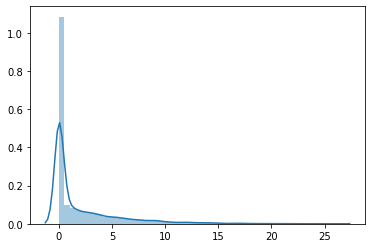

In [13]:
sns.distplot(predictions)

In [8]:
predictions = np.array(predictions)

In [9]:
accuracy_score(labels,predictions < 0.1)

0.9768621879439822

In [28]:
thresholds = [i *0.05 for i in range(0,20)]
scores= [accuracy_score(labels,predictions < t) for t in thresholds]

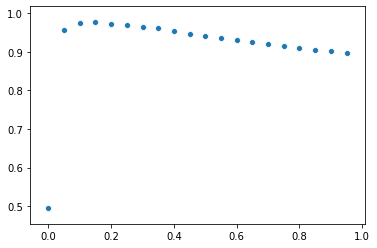

In [30]:
sns.scatterplot(thresholds,scores)

In [6]:
scores = np.array(scores)
idx = np.argmax(scores)
print(thresholds[idx], scores[idx])

NameError: name 'scores' is not defined